In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import h5py
import xml.etree.ElementTree as ET
import os
from PIL import Image
import glob
import os
import cmcrameri.cm as cmc

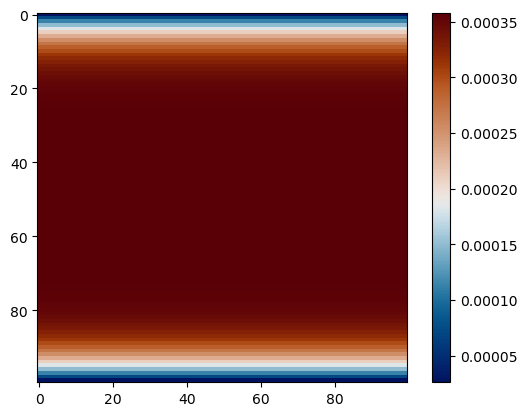

In [2]:
with h5py.File('channel2D.h5', 'r') as hf:
    keys = list(hf.keys())
    c_key_idx = np.sort([int(k.split('.')[-1]) for k in keys if 'u_magnitude' in k])
    # print(c_key_idx[-1])

    u_magnitude = hf['u_magnitude.'+str(c_key_idx[-1])][()].T

cm = cmc.vik

plt.imshow(u_magnitude,cmap=cm)
plt.colorbar()


In [3]:
folder_path = "./render_dir"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"Folder '{folder_path}' already exists.")

Folder './render_dir' already exists.


In [4]:
plot_var_name = 'u_magnitude'
with h5py.File('channel2D.h5', 'r') as hf:
    keys = list(hf.keys())
    c_key_idx = np.sort([int(k.split('.')[-1]) for k in keys if 'u_magnitude' in k])
    psi = hf['u_magnitude.0'][()].T

    for i in c_key_idx:
        plot_var = hf[f'{plot_var_name}.{str(i)}'][()].T

        # remove all values where psi == 0
        # plot_var *= psi > 0.0

        plt.figure()
        plt.imshow(plot_var,cmap=cm)
        plt.colorbar()
        # plt.contour(psi,[0.0],colors='k',linestyles='--')
        # plt.show()
        plt.savefig(folder_path+f'/{plot_var_name}_{str(i)}.png')
        plt.close()

In [5]:
#DEFINE BASE NAME FOR FILES
file_names = f"{folder_path}/{plot_var_name}_"
#NAME OF VIDEO FILE TO GENERATE
gif_file_name = f'{plot_var_name}_plot.gif'
#PARAMETERS FOR VIDEO
n_frames = i
fps = 20

frames =[]
for i in range(n_frames):
    frames += [Image.open(file_names+str(i)+'.png')]

#EACH FRAME LASTS 1000/FPS MILLISECONDS
frame_duration = 1000/fps
#SAVE PIL.IMAGE SEQUENCE INTO A GIF --> TURN ON OPTIMIZE FOR SMALLER FILE SIZE
frames[0].save(gif_file_name,save_all=True,optimize=False,append_images=frames[1:],loop=0,duration=frame_duration)